# Description

Make plots to show the computational complexity results comparing all coefficients.

# Modules loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ccc import conf

# Settings

In [2]:
INPUT_FILENAME_TEMPLATE = "time_test"

# Paths

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [4]:
COEF_COMP_DIR = conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp"
COEF_COMP_DIR.mkdir(parents=True, exist_ok=True)
display(COEF_COMP_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp')

In [5]:
OUTPUT_FIGURE_DIR = COEF_COMP_DIR / "time_test"
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/time_test')

In [6]:
INPUT_DIR = conf.RESULTS_DIR / "time_test"
display(INPUT_DIR)

PosixPath('/opt/data/results/time_test')

# Load results

In [7]:
time_results = pd.read_pickle(INPUT_DIR / f"{INPUT_FILENAME_TEMPLATE}.pkl")

In [8]:
time_results.shape

(15960, 4)

In [9]:
time_results.head()

,data_size,method,time,sim
0,100,p-1,0.000090,-0.002969
1,100,p-1,0.000064,0.043811
2,100,p-1,0.000031,0.001142
3,100,p-1,0.000085,0.258282
4,100,p-1,0.000031,0.041389


In [10]:
time_results["method"].unique()

array(['p-1', 's-1', 'cm-1', 'mic_e-1', 'mic-1', 'p-3', 's-3', 'cm-3',
       'mic_e-3', 'mic-3'], dtype=object)

# Processing

In [11]:
time_results = time_results.replace(
    {
        "method": {
            "p-1": "Pearson (1 core)",
            "s-1": "Spearman (1 core)",
            "cm-1": "CCC (1 core)",
            "mic-1": "MIC (1 core)",
            "mic_e-1": "MICe (1 core)",
            "p-3": "Pearson (3 cores)",
            "s-3": "Spearman (3 cores)",
            "cm-3": "CCC (3 cores)",
            "mic-3": "MIC (3 cores)",
            "mic_e-3": "MICe (3 cores)",
        }
    }
)

In [12]:
time_results.shape

(15960, 4)

In [13]:
time_results.head()

,data_size,method,time,sim
0,100,Pearson (1 core),0.000090,-0.002969
1,100,Pearson (1 core),0.000064,0.043811
2,100,Pearson (1 core),0.000031,0.001142
3,100,Pearson (1 core),0.000085,0.258282
4,100,Pearson (1 core),0.000031,0.041389


# Run numbers

In [14]:
plot_data = time_results

In [15]:
run_numbers = (
    plot_data[
        plot_data["method"].str.contains("1 core", regex=False)
        | plot_data["method"].str.contains("CCC (3 cores)", regex=False)
    ]
    .groupby(["data_size", "method"])["time"]
    .describe()
)
display(run_numbers)

count       mean       std        min  \
data_size method                                                      
100       CCC (1 core)       1000.0   0.000638  0.000030   0.000616   
          CCC (3 cores)      2000.0   0.000864  0.000336   0.000620   
          MIC (1 core)       1000.0   0.000725  0.000027   0.000642   
          MICe (1 core)      1000.0   0.000676  0.000027   0.000594   
          Pearson (1 core)   1000.0   0.000030  0.000003   0.000028   
          Spearman (1 core)  1000.0   0.000214  0.000012   0.000200   
500       CCC (1 core)         10.0   0.000945  0.000049   0.000917   
          CCC (3 cores)        20.0   0.001081  0.000244   0.000916   
          MIC (1 core)         10.0   0.011626  0.000200   0.011318   
          MICe (1 core)        10.0   0.008861  0.000099   0.008698   
          Pearson (1 core)     10.0   0.000039  0.000013   0.000031   
          Spearman (1 core)    10.0   0.000272  0.000024   0.000259   
1000      CCC (1 core)         10.0   0.001411  0.000045   0.001352   
          CCC (3 cores)        20.0   0.001423  0.000197   0.001305   
          MIC (1 core)         10.0   0.037035  0.000359   0.036555   
          MICe (1 core)        10.0   0.024683  0.000105   0.024500   
          Pearson (1 core)     10.0   0.000040  0.000018   0.000032   
          Spearman (1 core)    10.0   0.000318  0.000029   0.000294   
5000      CCC (1 core)         10.0   0.006699  0.000153   0.006540   
          CCC (3 cores)        20.0   0.005661  0.001280   0.003849   
          MIC (1 core)         10.0   0.509760  0.001702   0.506530   
          MICe (1 core)        10.0   0.227899  0.000712   0.226766   
          Pearson (1 core)     10.0   0.000051  0.000013   0.000044   
          Spearman (1 core)    10.0   0.000660  0.000025   0.000633   
10000     CCC (1 core)         10.0   0.014376  0.000156   0.014089   
          CCC (3 cores)        20.0   0.011748  0.002949   0.007434   
          MIC (1 core)         10.0   1.593811  0.005953   1.586504   
          MICe (1 core)        10.0   0.572184  0.000891   0.571086   
          Pearson (1 core)     10.0   0.000064  0.000015   0.000056   
          Spearman (1 core)    10.0   0.001148  0.000021   0.001127   
50000     CCC (1 core)         10.0   0.081954  0.000460   0.081520   
          CCC (3 cores)        20.0   0.062749  0.020206   0.042135   
          MICe (1 core)        10.0   4.840202  0.005833   4.833923   
          Pearson (1 core)     10.0   0.000175  0.000023   0.000162   
          Spearman (1 core)    10.0   0.006281  0.000192   0.005967   
100000    CCC (1 core)         10.0   0.174698  0.000853   0.172981   
          CCC (3 cores)        20.0   0.132427  0.043216   0.089384   
          Pearson (1 core)     10.0   0.000419  0.000261   0.000310   
          Spearman (1 core)    10.0   0.011976  0.000482   0.011688   
1000000   CCC (1 core)         10.0   2.300074  0.059685   2.243103   
          CCC (3 cores)        20.0   1.835366  0.568365   1.263928   
          Pearson (1 core)     10.0   0.007424  0.001050   0.006337   
          Spearman (1 core)    10.0   0.175983  0.002461   0.172887   
10000000  CCC (1 core)         10.0  40.130216  0.064422  40.028379   
          CCC (3 cores)        10.0  21.846361  0.102418  21.685791   
          Pearson (1 core)     10.0   0.094118  0.000621   0.092937   
          Spearman (1 core)    10.0   2.943287  0.005418   2.932472   

                                   25%        50%        75%        max  
data_size method                                                         
100       CCC (1 core)        0.000628   0.000632   0.000637   0.001261  
          CCC (3 cores)       0.000635   0.000870   0.000950   0.005126  
          MIC (1 core)        0.000706   0.000725   0.000744   0.000810  
          MICe (1 core)       0.000660   0.000677   0.000691   0.001160  
          Pearson (1 core)    0.000030   0.000030   0.000031   0.000090  
          Spearman (1 core)   0.

# Plot

In [16]:
hue_order = sorted(time_results["method"].unique())

In [17]:
hue_order

['CCC (1 core)',
 'CCC (3 cores)',
 'MIC (1 core)',
 'MIC (3 cores)',
 'MICe (1 core)',
 'MICe (3 cores)',
 'Pearson (1 core)',
 'Pearson (3 cores)',
 'Spearman (1 core)',
 'Spearman (3 cores)']

In [18]:
deep_colors = sns.color_palette("Paired")
display(deep_colors)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [19]:
def format_data_size(x):
    if x < 1000:
        return f"{int(x)}"
    elif x < 1000000:
        return f"{int(x/1000)}k"

    return f"{int(x/1000000)}m"


plot_data = plot_data.assign(data_size=plot_data["data_size"].apply(format_data_size))

## First analysis

Here I take a look if using more than 1 core benefits methods.

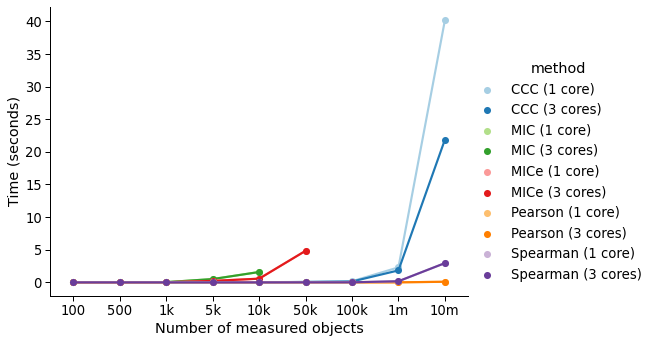

In [20]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.4,
    )

    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds)")

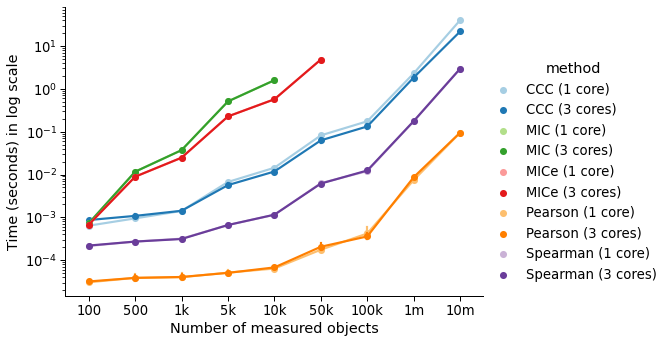

In [21]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.4,
    )

    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds) in log scale")

    g.ax.set_yscale("log")

Only CCC is really taking advantage of more than 1 core, so I'll remove the rest below.

# Final analysis

In [22]:
# select runs with 3 cores for the other methods
plot_data = plot_data.replace(
    {
        "method": {
            "Pearson (3 cores)": "Pearson",
            "Spearman (3 cores)": "Spearman",
            "MIC (3 cores)": "MIC",
            "MICe (3 cores)": r"$\mathregular{MIC_e}$",
        }
    }
)

In [23]:
plot_data["method"].unique()

array(['Pearson (1 core)', 'Spearman (1 core)', 'CCC (1 core)',
       'MICe (1 core)', 'MIC (1 core)', 'Pearson', 'Spearman',
       'CCC (3 cores)', '$\\mathregular{MIC_e}$', 'MIC'], dtype=object)

In [24]:
hue_order = [
    "MIC",
    r"$\mathregular{MIC_e}$",
    "CCC (1 core)",
    "CCC (3 cores)",
    "Spearman",
    "Pearson",
]

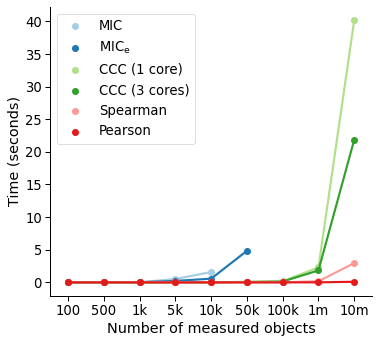

In [25]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.1,
        legend=False,
    )

    plt.legend(loc="best")
    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds)")

    plt.savefig(
        OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}.svg",
        bbox_inches="tight",
        facecolor="white",
    )

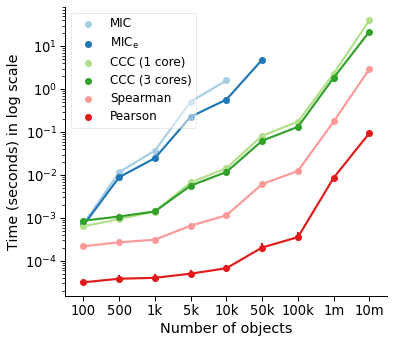

In [26]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.1,
        legend=False,
    )

    plt.legend(loc="best", fontsize="small", framealpha=0.5)
    plt.xlabel("Number of objects")
    plt.ylabel("Time (seconds) in log scale")
    g.ax.set_yscale("log")

    plt.savefig(
        OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}-log.svg",
        bbox_inches="tight",
        facecolor="white",
    )

# Create final figure

In [27]:
from svgutils.compose import Figure, SVG

In [28]:
Figure(
    "19.79335cm",
    "17.09335cm",
    # white background
    SVG(COEF_COMP_DIR / "white_background.svg").scale(0.5).move(0, 0),
    # SVG(OUTPUT_FIGURE_DIR / "time_test.svg").scale(0.05),
    SVG(OUTPUT_FIGURE_DIR / "time_test-log.svg").scale(0.05),
).save(OUTPUT_FIGURE_DIR / "time_test-main.svg")

Compile the manuscript with manubot and make sure the image has a white background and displays properly.